# Graphing distributions

**Note**: The following is a short guide to graphing with R. 
Data is often something we cannot use directly and seeing data visualization is critical to understanding the data set.
Because we cannot go through each and every record to understand the dataset, 
we need graphs to summarize and tell us a story which can be understood by people of diverse technical backgrounds. 
Pictures are the best way to do this. 

You may have likely covered some exercises in graphing in the prior courses 
and we will cover it in-depth in the visualization course; 
but it's good to review some basics of what we'll be doing in this course.


In the previous lab we dicussed different types of data, 
such as qualitative (discrete) and quantitative (continuous), 
and different ways of analyzing the data, such as those involving one variable (univariate analyses) 
and those involving two variables (bivariate analyses). 
As you may have guessed, there are different ways to graph univariate quantitative data, univariate qualitative data, and bivariate quantitative data. 

* Note: some of the material in this lab comes from: http://onlinestatbook.com/2/index.html 

# Univariate Analyses of Qualitative Data:

A frequency table can be generated from data which can then be graphed as a bar plot or a pie chart.   
Data -> frequency table  -> bar graph/pie chart

|no of cylinders|frequency|
|:-------------:|:-------:|
|3|4|
|4|204|
|5|3|
|6|84|
|8|103|

### Remember:

* Since qualitative data represent individual categories, calculating descriptive statistics is limited. Mean, median, and measures of spread cannot be calculated; however, the mode can be calculated.

* One way in which we can graphically represent qualitative data is in a pie chart. Categories are represented by slices of the pie, whose areas are proportional to the percentage of items in that category.

* The key point about the qualitative data is that they do not come with a pre-established ordering (the way numbers are ordered).

* Bar charts can also be used to graph qualitative data. The Y axis displays the frequencies and the X axis displays the categories.

## Pie Charts:

### Plotting a pie chart


Each category is represented by a slice of the pie (wedge) in the pie chart. 
Our _bdims_ dataset has just one categorical variable: gender. 
The area of each slice, or each category in the variable, 
is proportional to the percentage of responses in that category.
This is simply the relative frequency multiplied by 100.

Pie charts are effective for displaying the relative frequencies of a **small number of categories**. 
They are not recommended, however, when you have a large number of categories.

In [1]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")
head(bdims)

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
6,43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


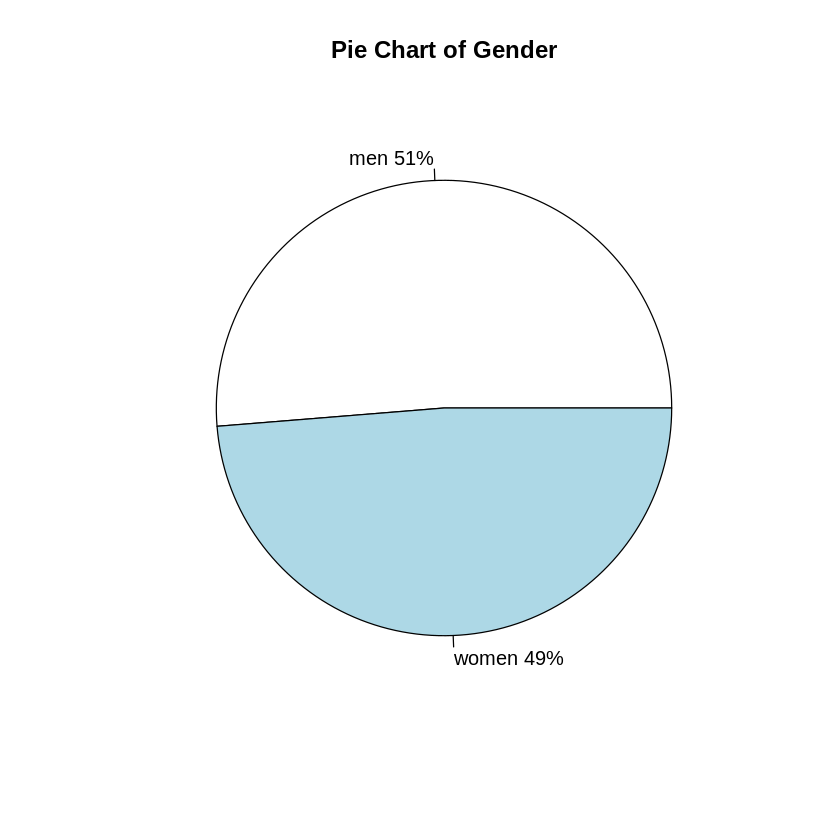

In [2]:
slices <- table(bdims$sex)
lbls <- c("men","women")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add actual percentage values to labels in variable "lbls" 
lbls <- paste(lbls,"%",sep="") # add % symbol to labels in "lbls" 
pie(slices, labels = lbls, main="Pie Chart of Gender")

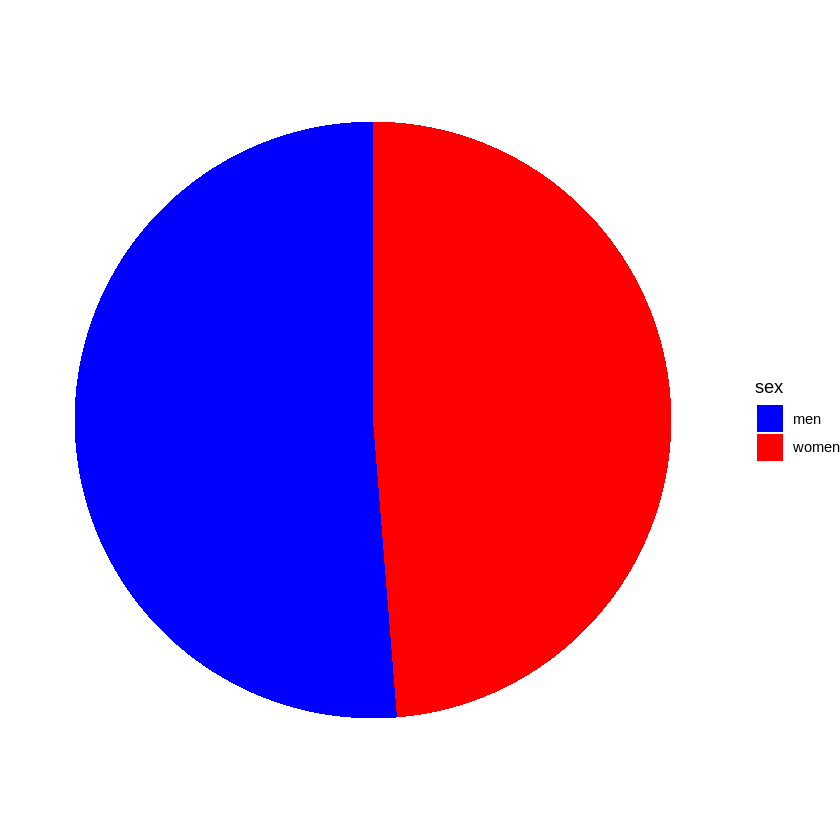

In [3]:
library(ggplot2)

ggplot(bdims, aes(x="",fill=sex)) + geom_bar() + coord_polar(theta="y") + 
                                    theme_void() + scale_fill_manual(labels=c("men","women"), values=c("blue","red"))

Here is another important point about pie charts. 
If they are based on a small number of observations, it can be misleading to label the pie slices with percentages. For example, if just 5 people had been interviewed by Apple Computers, and 3 were former Windows users, 
it would be misleading to display a pie chart with the Windows slice showing 60%. 
With so few people interviewed, such a large percentage of Windows users might easily have occured since chance can cause large errors with small samples. 
In this case, it is better to alert the user of the pie chart to the actual numbers involved. 
The slices should therefore be labeled with the actual frequencies observed (e.g., 3) instead of with percentages.

We will learn more about sampling error and small sample sizes later in the course.

## Bar Graphs:

Bar charts can also be used to represent frequencies of different categories . 
Frequencies are shown on the Y-axis and the categories are shown on the X-axis. 
Typically the Y-axis shows the number of observations rather than the percentage of observations in each category as is typical in pie charts.

The below figure shows the number of people playing card games at the Yahoo website on a Sunday and on a Wednesday in the Spring of 2001. We see that there were more players overall on Wednesday compared to Sunday. 
The number of people playing Pinochle was the same on these two days. 
In contrast, there were about twice as many people playing Hearts on Wednesday as on Sunday. 
Facts like these emerge clearly from a well-designed bar chart.

<img src='../images/bar_graph_h.jpg'/>

## R to create bar charts

In [4]:
auto_mpg <- read.csv("/dsa/data/all_datasets/auto-mpg/auto-mpg.csv", header = T, sep=",")

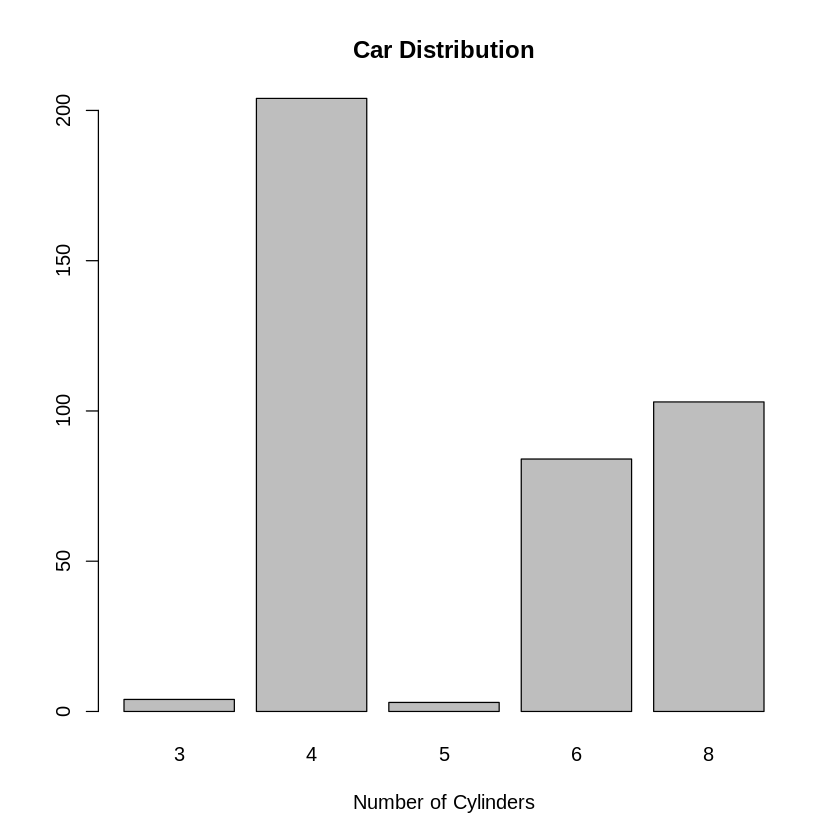

In [5]:
barplot(table(auto_mpg$cylinders), main="Car Distribution",xlab="Number of Cylinders")

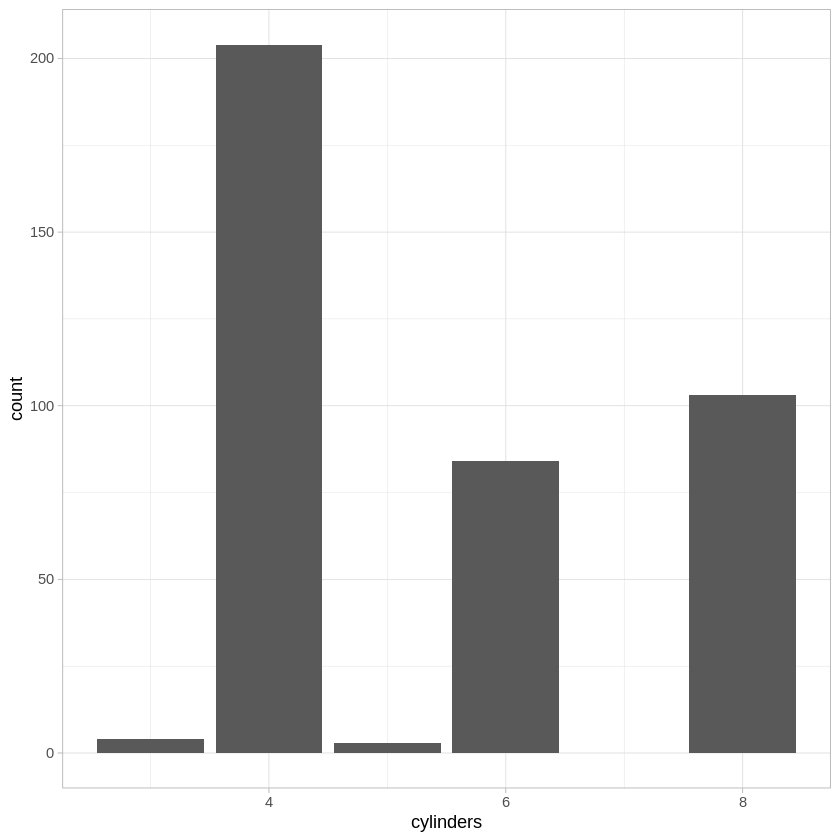

In [6]:
ggplot(auto_mpg) + geom_bar(aes(x=cylinders), stat="count") + theme_light()

# Univariate Analyses of Quantitative Data:

A histogram or a boxplot are ideal if the data are continuous or quantitative. 
Like in the previous section, histograms and boxplots measure the frequency of values for a single variable. 

## Histograms:

A histogram is a graphical method for displaying the shape of a distribution. 
It is particularly useful when there are a large number of observations.
We begin with an example consisting of the scores of 642 students on a psychology test. 
The test consists of 197 items, each graded as "correct" or "incorrect." 
The students' scores ranged from 46 to 167.
The first step is to create a frequency table. Unfortunately, a simple frequency table would be too big, 
containing over 100 rows. 
To simplify the table, we group scores together as shown in this table.

<img src='../images/histogram.jpg'/>

To create this table, the range of scores was broken into intervals, often referred to as buckets or _bins_. 
The first interval is from 39.5 to 49.5, the second from 49.5 to 59.5, etc. 
Next, the number of scores falling into each interval was counted to obtain the class frequencies. 
There are three scores in the first interval, 10 in the second, etc.

In R histograms the data are grouped into _bins_. 
The `hist()` function will choose an ideal set of bin interval values automatically if you don't supply one. 
But, choosing your own bin value will help you understand the data better. 
Sometimes a small bin size will unearth interesting patterns, whereas at other times, large bin sizes are better.

In [7]:
?hist

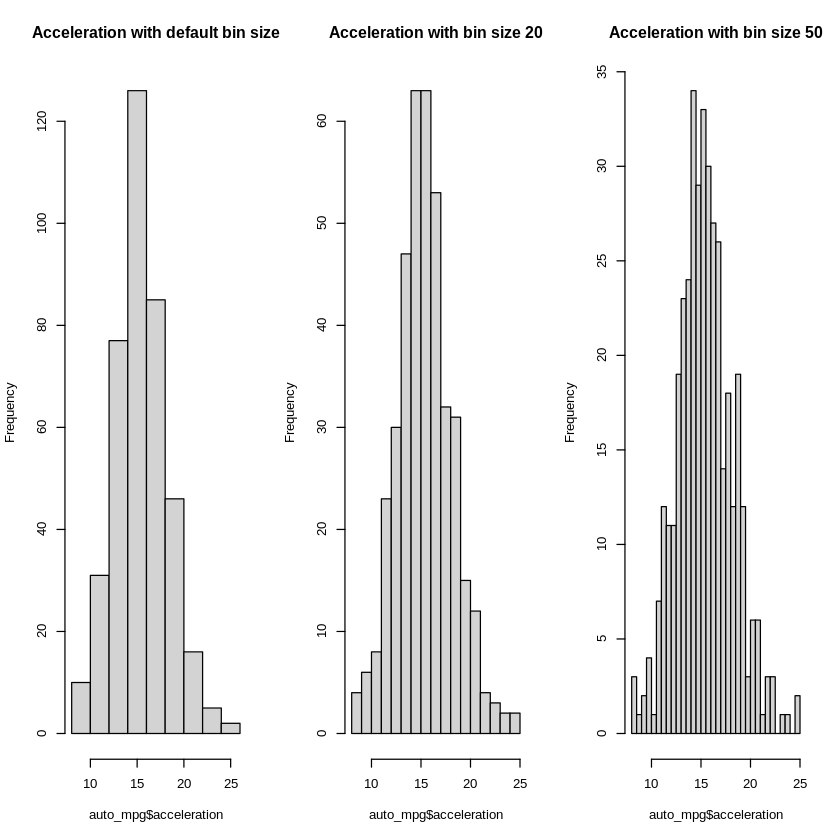

In [8]:
#plain R

# par(mfrow()) helps you create multi-paneled plotting window. 
# mfrow() takes an input vector of length 2. 
# The first argument specifies the number of rows and 
# the second the number of columns of plots. 
# c(1,3) will create plots in 3 columns and in 1 row. 
par(mfrow=c(1,3))

hist(auto_mpg$acceleration, main="Acceleration with default bin size")

# breaks: define number of bins you want. 
# In other words, its the custom bin size
hist(auto_mpg$acceleration, main="Acceleration with bin size 20",breaks=20)
hist(auto_mpg$acceleration, main="Acceleration with bin size 50",breaks=50)

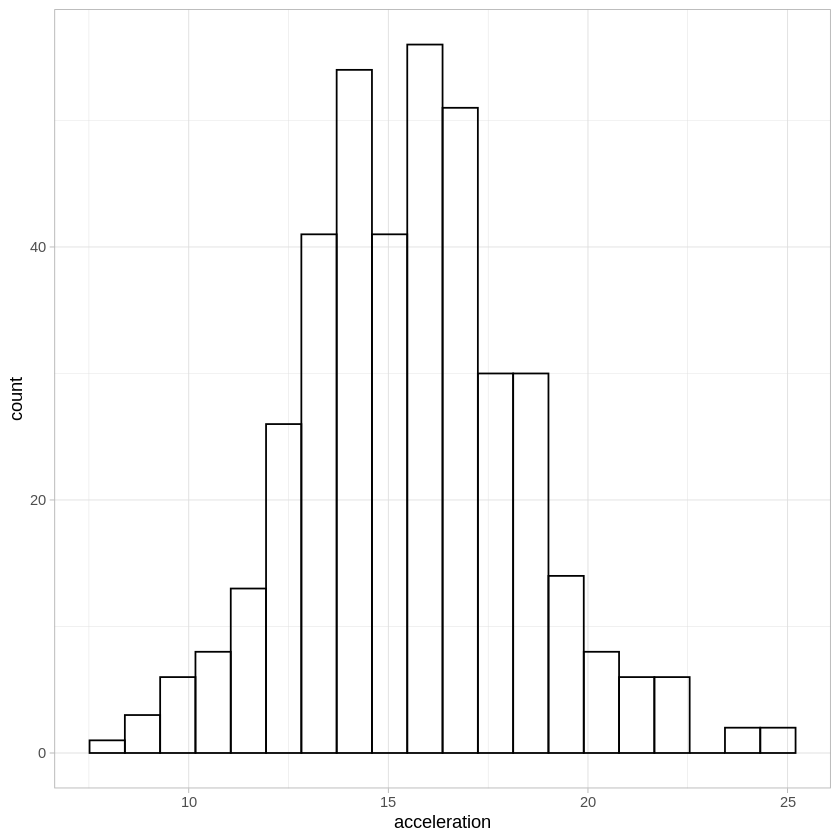

In [9]:
# ggplot

ggplot(auto_mpg) + geom_histogram(aes(x=acceleration), fill=NA, color="black", bins=20) + theme_light()


## Boxplots:

Box plots are useful for identifying outliers and for comparing distributions. 
We will explain box plots with the help of data from an in-class experiment. 

As part of the "Stroop Interference Case Study," 
students in introductory statistics were presented with a page containing 30 colored rectangles. 
Their task was to name the colors as quickly as possible. 
Their times (in seconds) were recorded. 
We'll compare the scores for the 16 men and 31 women who participated in the experiment by 
making separate box plots for each gender.
Such a display is said to involve parallel box plots.

There are several steps in constructing a box plot. 
The first relies on the 25th, 50th, and 75th percentiles in the distribution of scores. 
The first figure below shows how these three statistics are used. 
For each gender, we draw a box extending from the 25th percentile to the 75th percentile. 
The 50th percentile is drawn inside the box. 
Therefore, the bottom of each box is the 25th percentile, the top is the 75th percentile, 
and the line in the middle is the 50th percentile.

The data for the women in our sample are shown in the next table.

<img src='../images/table_1.jpg'/>

For these data, the 25th percentile is 17, the 50th percentile is 19, and the 75th percentile is 20. 

<img src='../images/figure_1.jpg'/>

For the men (whose data are not shown), the 25th percentile is 19, the 50th percentile is 22.5, and the 75th percentile is 25.5.

Before proceeding, the terminology in the following table is helpful.

<img src='../images/table_2.jpg'/>


Continuing with the box plots, we put "whiskers" above and below each box to give additional information about the spread of the data. 
Whiskers are vertical lines that end in a horizontal stroke. 
Whiskers are drawn from the upper and lower hinges to the upper and lower adjacent values 
(24 and 14 for the women's data).
<img src='../images/figure_2.jpg'/>

Although we don't draw whiskers all the way to outside or far out values, we still wish to represent them in our box plots. This is achieved by adding additional marks beyond the whiskers. Specifically, outside values are indicated by small "o's" and far out values are indicated by asterisks (*).

  **Note of caution**: Some plotting libraries use the true min and max values instead of a particular percentile range.
In these cases, you will have no outlier plot points.

In our data, there are no far out values and just one outside value. This outside value of 29 is for the women and is shown in the next figure.

<img src='../images/figure_3.jpg'/>

There is one more mark to include in box plots (although sometimes it is omitted). 
We indicate the mean score for a group by inserting a plus sign. 
The next figure shows the result of adding means to our box plots.

<img src='../images/figure_4.jpg'/>

The following figure provides a revealing summary of the data. 
Since half the scores in a distribution are between the hinges 
(recall that the hinges are the 25th and 75th percentiles), 
we see that half the women's times are between 17 and 20 seconds, 
whereas half the men's times are between 19 and 25.5. 
We also see that women generally named the colors faster than the men did, 
although one woman was slower than almost all of the men. 
This plot shows the box plot for the women's data with detailed labels.

<img src='../images/figure_5.jpg'/>

Box plots provide basic information about a distribution. 
For example, a distribution with a positive skew would have a longer whisker in the positive direction than in the negative direction. 
A larger mean than median would also indicate a positive skew. 
Box plots are good at portraying extreme values and are especially good at showing differences between distributions. 
However, many of the details of a distribution are not revealed in a box plot, and to examine these details one should create a histogram to better understand the shape of the data distribution.

**Note:** In the help output generated below, pay attention to how the `range` parameter can affect the whiskers.

In [10]:
help(boxplot)

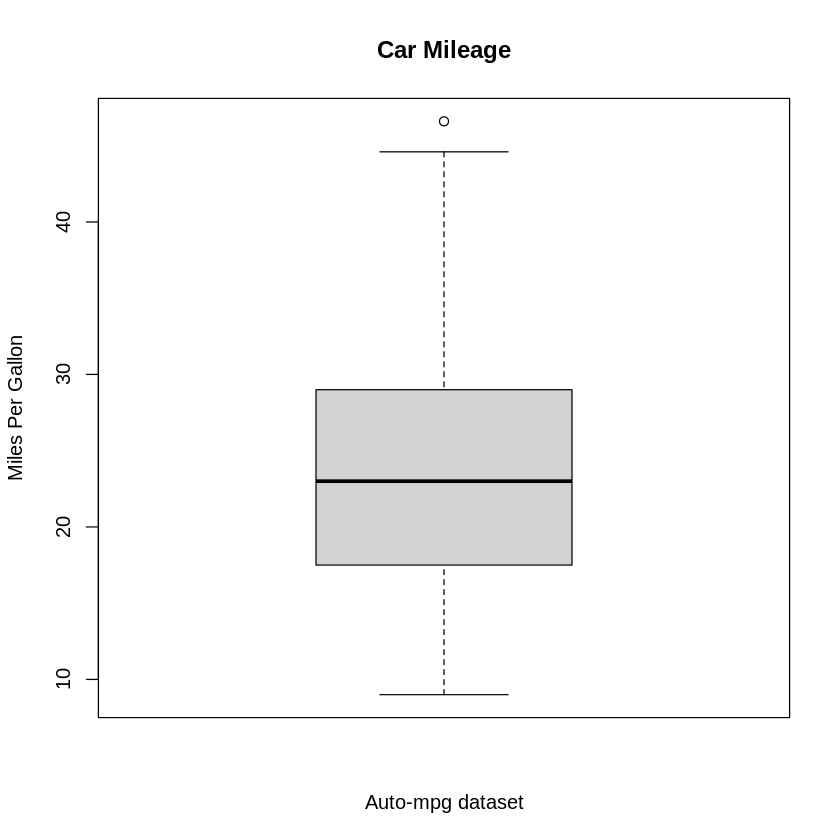

In [11]:
boxplot(auto_mpg$mpg,data=auto_mpg, main="Car Mileage", xlab="Auto-mpg dataset", ylab="Miles Per Gallon")

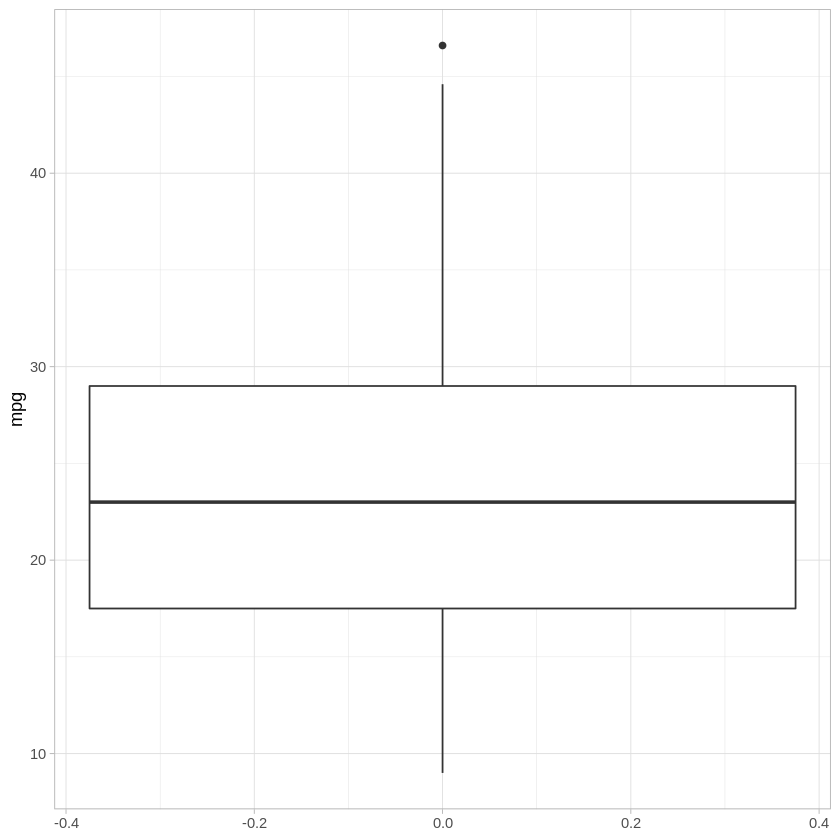

In [12]:
ggplot(auto_mpg) + geom_boxplot(aes(y=mpg)) + theme_light()

Recall that this box plot shows the min, 1st quartile, median, 3rd quartile, max, and outliers. 
The lowest bar is often the min, 
the second lowest bar shows the 1st quartile (the cutoff point for the lowest 25% of all values), 
the thick middle line is the median (the cutoff point for the lowest 50%), 
the fourth line is the 3rd quartile (the cutoff point for the lowest 75% of the values), 
and the highest horizontal line is often the max. 
The circles represent the outliers _beyond the **min** or **max**_. 


The `auto` dataset has many variables. 
Two of them are "miles per gallon" and "number of cylinders". 
Here we break up the data by the number of cylinders and make a box plot for each category (3 cylinders, 4 cylinders, etc.). 

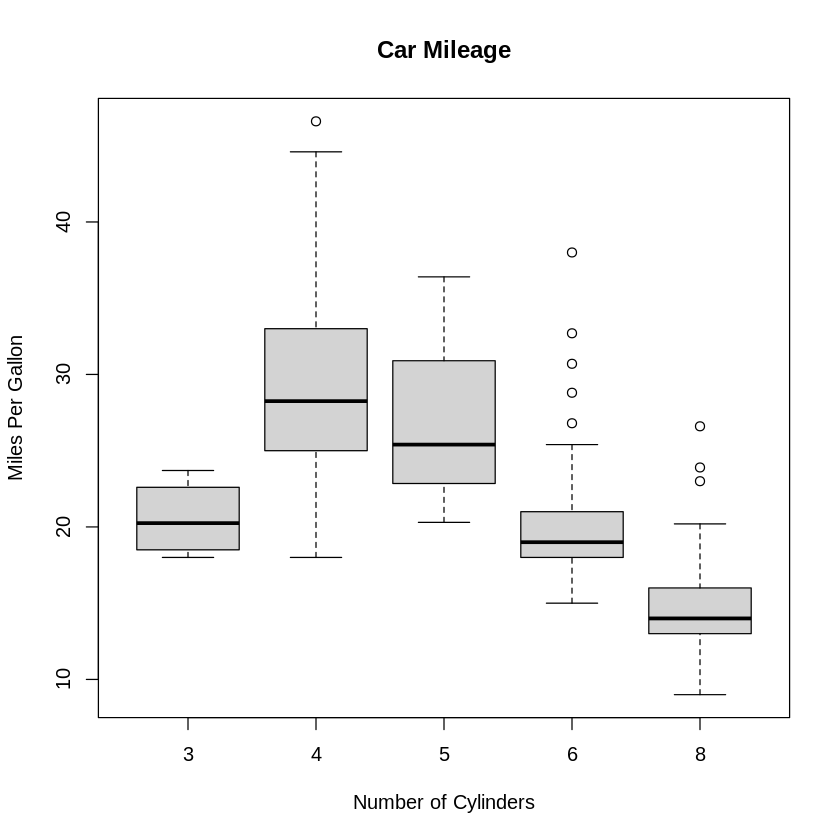

In [13]:
boxplot(auto_mpg$mpg~auto_mpg$cylinders,data=auto_mpg, main="Car Mileage", xlab="Number of Cylinders", ylab="Miles Per Gallon")

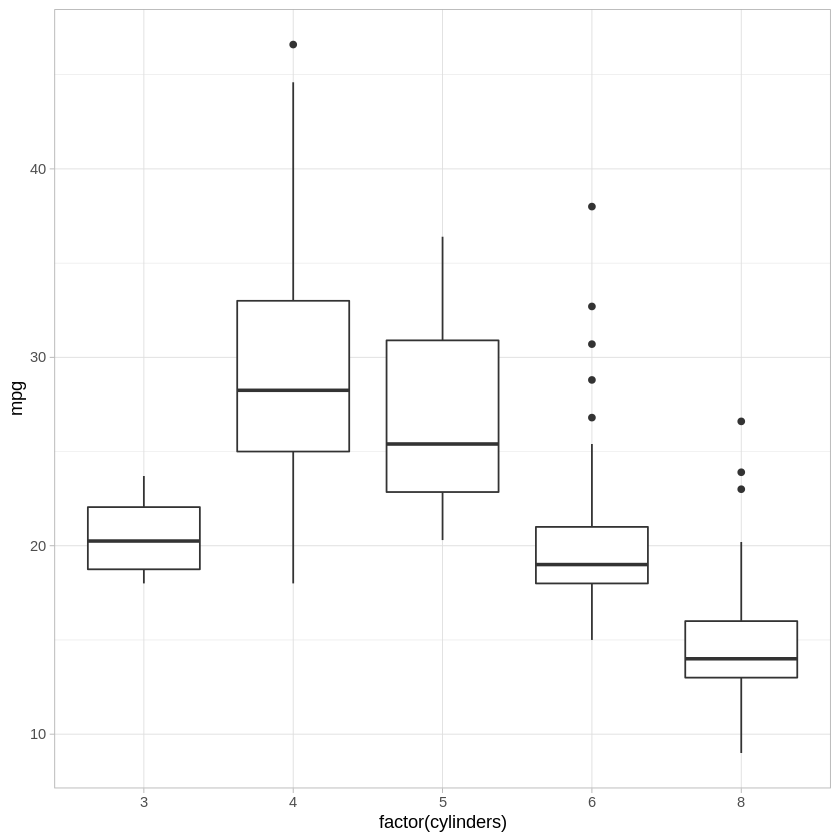

In [14]:
ggplot(auto_mpg) + geom_boxplot(aes(x=factor(cylinders), y=mpg)) + theme_light()

**Recall the note about range**, and observe what setting range to _4_ instead of the default _1.5_ does to whiskers and outliers.

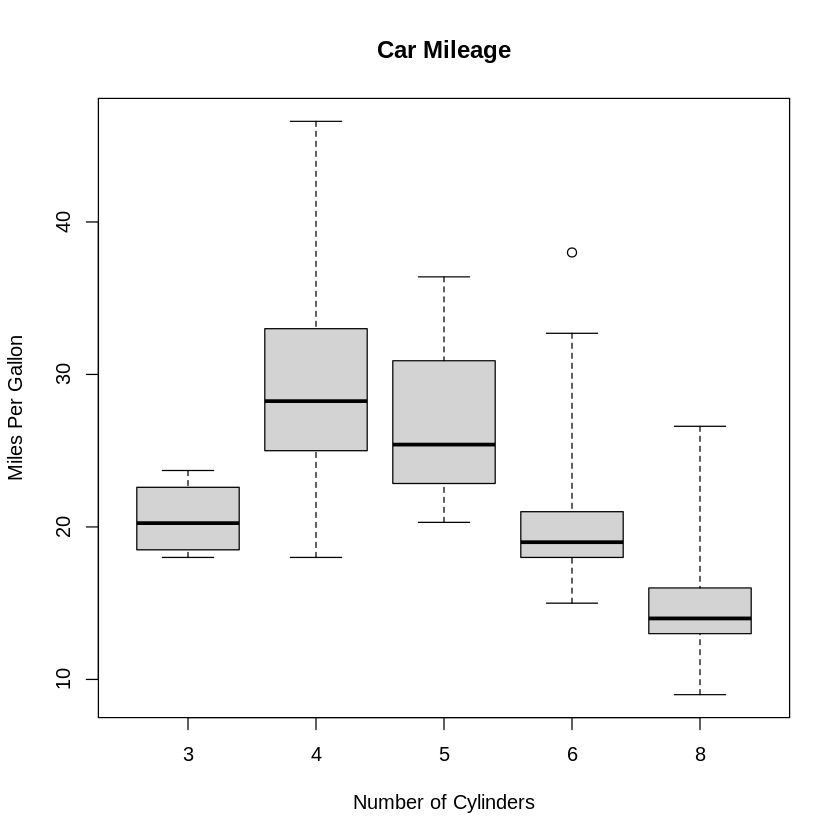

In [15]:
boxplot(auto_mpg$mpg~auto_mpg$cylinders,data=auto_mpg, 
        range=4, 
        main="Car Mileage", xlab="Number of Cylinders", ylab="Miles Per Gallon")

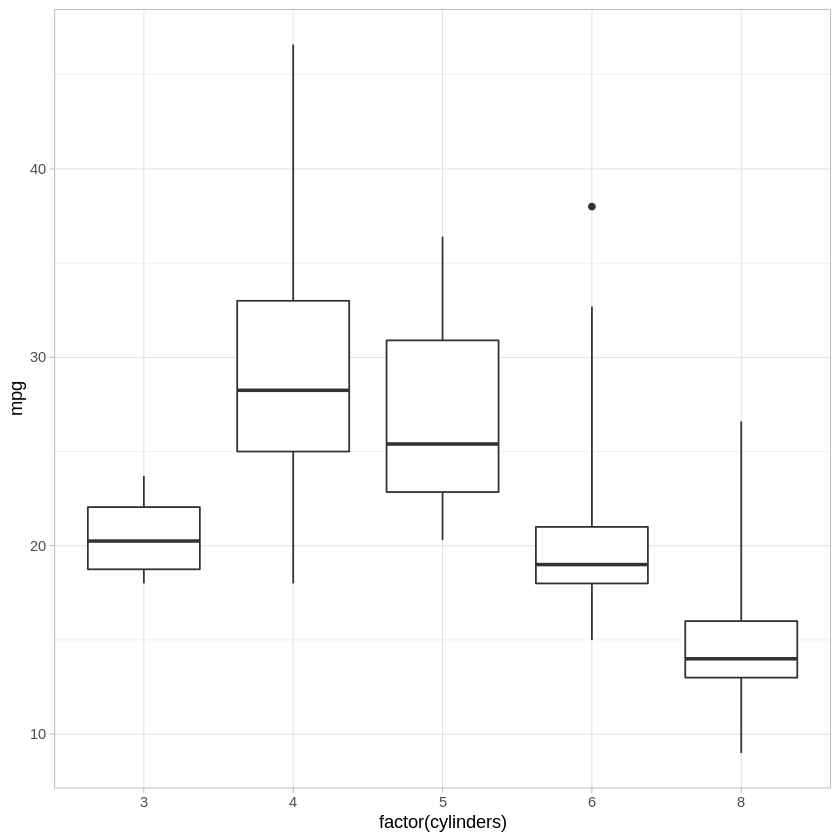

In [16]:
ggplot(auto_mpg) + geom_boxplot(aes(x=factor(cylinders), y=mpg), coef=4) + theme_light()

# Bivariate Analyses of Quantitative Data:


Measures of central tendency, variability, and spread summarize a single variable by providing important information about its distribution. 
Often, more than one variable is collected on each datum. 
For example, in large health studies of populations it is common to obtain variables such as age, sex, height, weight, blood pressure, and total cholesterol on each individual. 
Economic studies may be interested in, among other things, personal income and years of education. 
As a third example, most university admissions committees ask for an applicant's high school grade point average and standardized admission test scores (e.g., SAT). 

In this section we consider bivariate data, 
which for now consists of two quantitative variables for each individual.
Our first interest is in summarizing such data in a way that is analogous to summarizing univariate (single variable) data.

Bivariate data considers two variables simultaneously. 
A very common graph, that we'll see more often in the linear regression section, is the scatterplot. 
It just plots individual ordered pairs on a graph. 


## Scatterplots:

X-Y scatter plots are a great way to visually explore bivariate relationships. 
A scatter plot of two variables shows the values of one variable on the Y axis and the values of the other variable on the X axis.
Scatter plots are well suited for revealing the relationship between two variables. 

By way of illustration, let's consider something with which we are all familiar: age. 
Let’s begin by asking if people tend to marry other people of about the same age. 
Our experience tells us "yes," but how good is the correspondence? 
One way to address the question is to look at pairs of ages for a sample of married couples. 

This table below shows the ages of 10 married couples. 
Going across the columns we see that, yes, husbands and wives tend to be of about the same age, with men having a tendency to be slightly older than their wives. 
This is no big surprise, but at least the data bear out our experiences, which is not always the case.

<img src='../images/tab1.jpg'/>

The pairs of ages in the table are from a dataset consisting of 282 pairs of spousal ages -- i.e., too many to make sense of from a table. 
What we need is a way to summarize the 282 pairs of ages. 
We know that each variable can be summarized by a histogram (see prior section) and by a mean and standard deviation.

<img src='../images/double.jpg'/>

Each distribution is fairly skewed with a long right tail. 
From the prior table we saw that not all husbands are older than their wives and it is important to see that this fact is lost when we separate the variables. 
That is, even though we provide summary statistics on each variable, the pairing within couples is lost by separating the variables. 
We cannot say, for example, based on the means alone what percentage of couples has younger husbands than wives. 
We have to count across pairs to find this out. 

Only by maintaining the pairing can meaningful answers be found about couples per se. 
Another example of information not available from the separate descriptions of husbands and wives' ages is the mean age of husbands with wives of a certain age. 
For instance, what is the average age of husbands with 45-year-old wives? 
Finally, we do not know the relationship between the husband's age and the wife's age.

We can learn much more by displaying the bivariate data in a graphical form that maintains the pairing. 
This figure shows a scatter plot of the paired ages. 
The X-axis represents the age of the husband and the Y-axis the age of the wife.

<img src='../images/fig2.jpg'/>


There are two important characteristics of the data revealed by this figure. 
First, it is clear that there is a strong relationship between the husband's age and the wife's age: 
the older the husband, the older the wife. 
When one variable (Y) increases with the second variable (X), 
we say that X and Y have a positive association. 
Conversely, when Y decreases as X increases, we say that they have a negative association.
Second, the points cluster along a straight line. When this occurs, the relationship is called a linear relationship.

Not all scatter plots show linear relationships.
The image below shows the results of an experiment conducted by Galileo on projectile motion. 
In the experiment, Galileo rolled balls down an incline and measured how far they traveled as a function of the release height. 
It is clear from the figure that the relationship between "Release Height" and "Distance Traveled" is not described well by a straight line: 
If you drew a line connecting the lowest point and the highest point, all of the remaining points would be above the line. 
The data are better fit by a parabola.

<img src='../images/fig4.jpg'/>

Scatter plots that show linear relationships between variables can differ in several ways including the slope of the line about which they cluster and how tightly the points cluster about the line.
A statistical measure of the strength of the relationship between two quantitative variables that takes these factors into account is correlation.

The following are two scatterplots comparing the weight of the `car` to `horsepower` and to `miles per gallon` in the `auto_mpg` data set.  

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


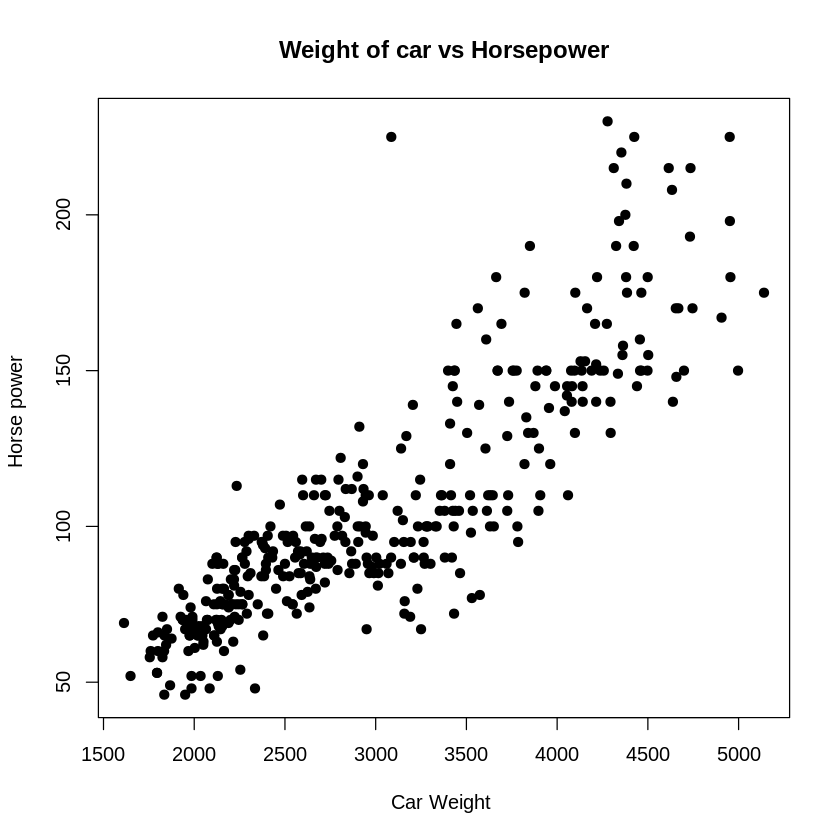

In [17]:
#plot is the basic command to plot a scatter plot. It takes x and y arguments for input variables. The parameter pch is used 
#to set the symbol used to denote the observations on the plot. Here pch=19 indicates solid circles. 
plot(auto_mpg$weight, auto_mpg$horsepower, main="Weight of car vs Horsepower", 
  	xlab="Car Weight ", ylab="Horse power ", pch=19)

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


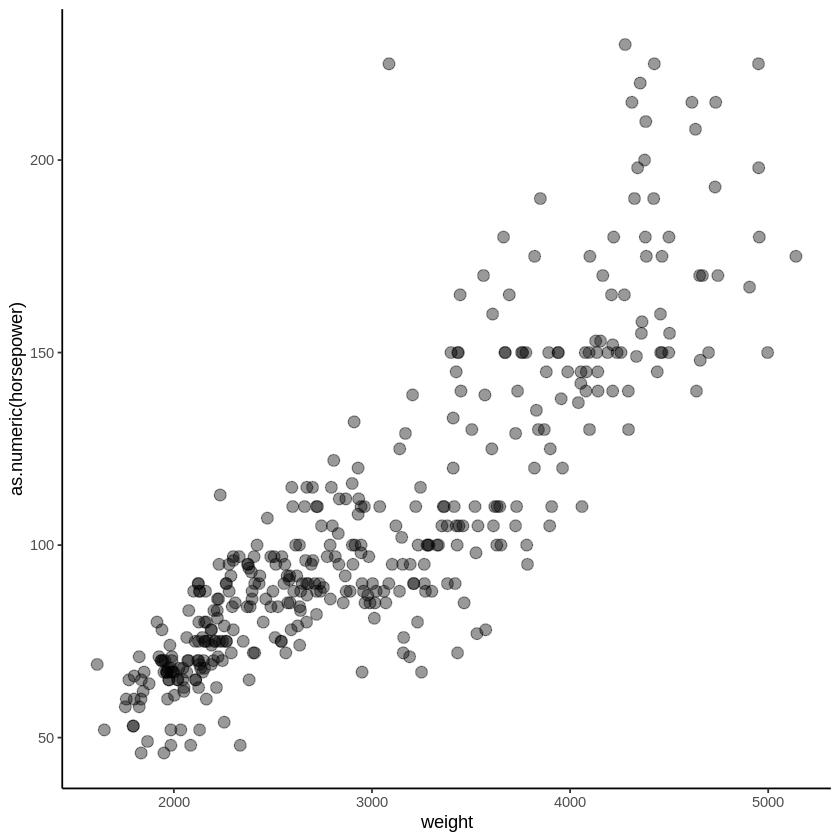

In [18]:
ggplot(auto_mpg) + geom_point(aes(x=weight, y=as.numeric(horsepower)), size=3, alpha=.4) + theme_classic()

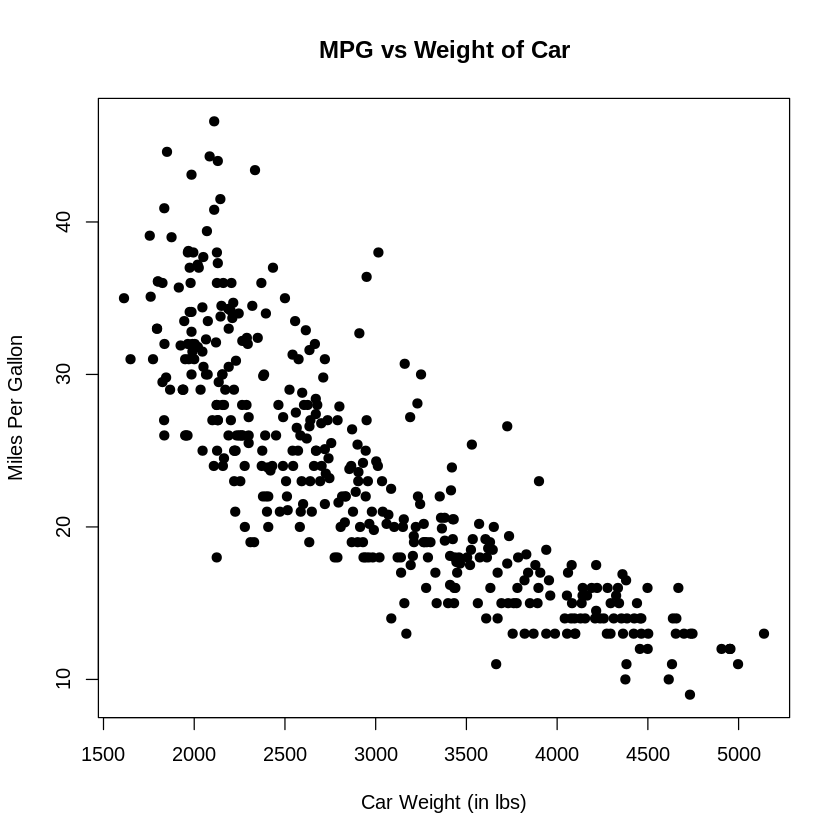

In [19]:
plot(auto_mpg$weight, auto_mpg$mpg, main="MPG vs Weight of Car", 
  	xlab="Car Weight (in lbs)", ylab="Miles Per Gallon", pch=19)

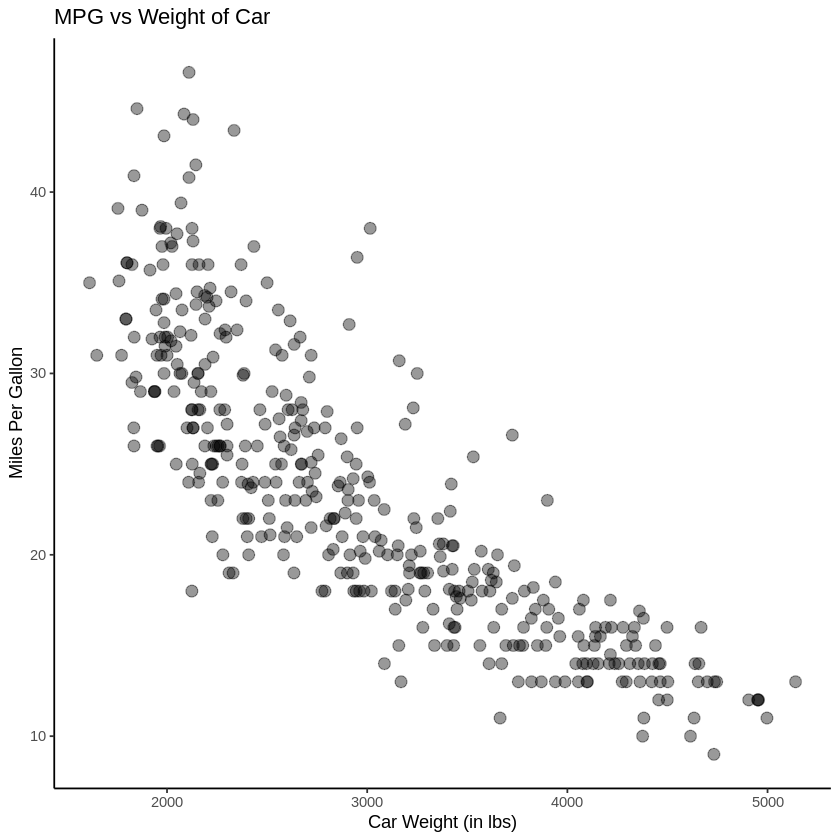

In [20]:
ggplot(auto_mpg) + geom_point(aes(x=weight, y=mpg), size=3, alpha=.4) + 
theme_classic() + labs(title="MPG vs Weight of Car", x="Car Weight (in lbs)", y="Miles Per Gallon")

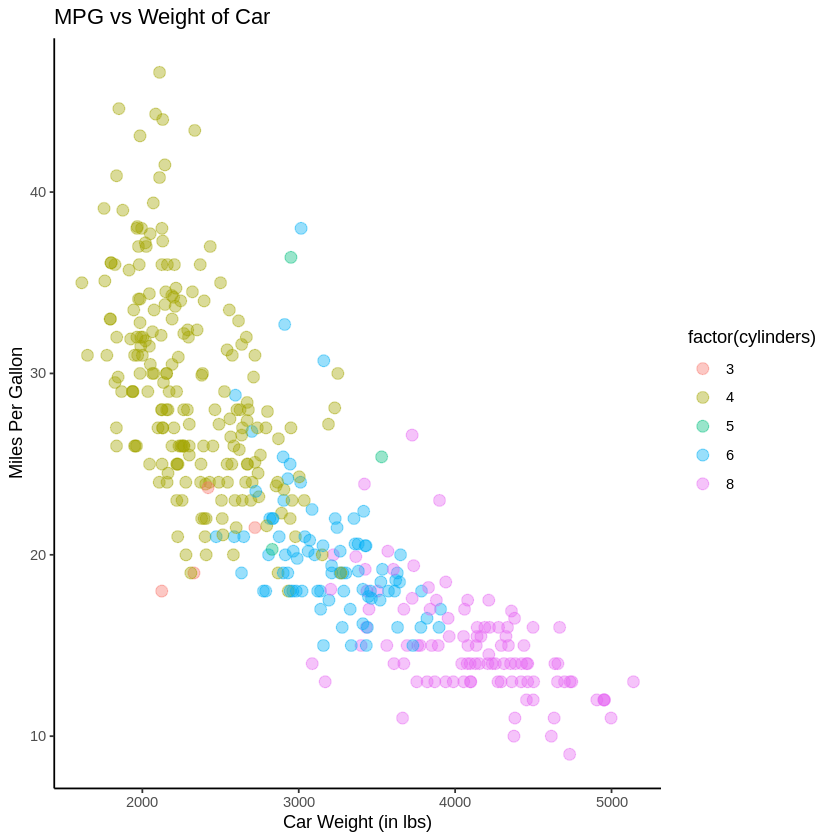

In [21]:
ggplot(auto_mpg) + geom_point(aes(x=weight, y=mpg, color=factor(cylinders)), size=3, alpha=.4) + 
theme_classic() + labs(title="MPG vs Weight of Car", x="Car Weight (in lbs)", y="Miles Per Gallon")

## Line Charts:

Line charts are also a type of bivariate plot. 
Its implementation is not as easy as other types of charts. 
Line charts can be created using the function lines(x, y, type=) where x and y are numeric vectors of form (x,y) points to connect. 
The parameter <span style="color:#e0763c">type=</span> takes different values as listed below for generating different kinds of points on the plot.

|type|	description|
|----|-------------|
|p   |   	points|
|l	 |   lines|
|o	 |   overplotted points and lines|
|b, c|	points (empty if "c") joined by lines|
|s, S|	stair steps|
|h	 |   histogram-like vertical lines|
|n	 |   does not produce any points or lines|

Let's go ahead and make a line plot with points for female heights

In [22]:
male <- subset(bdims, sex == 1)
female <- subset(bdims, sex == 0)

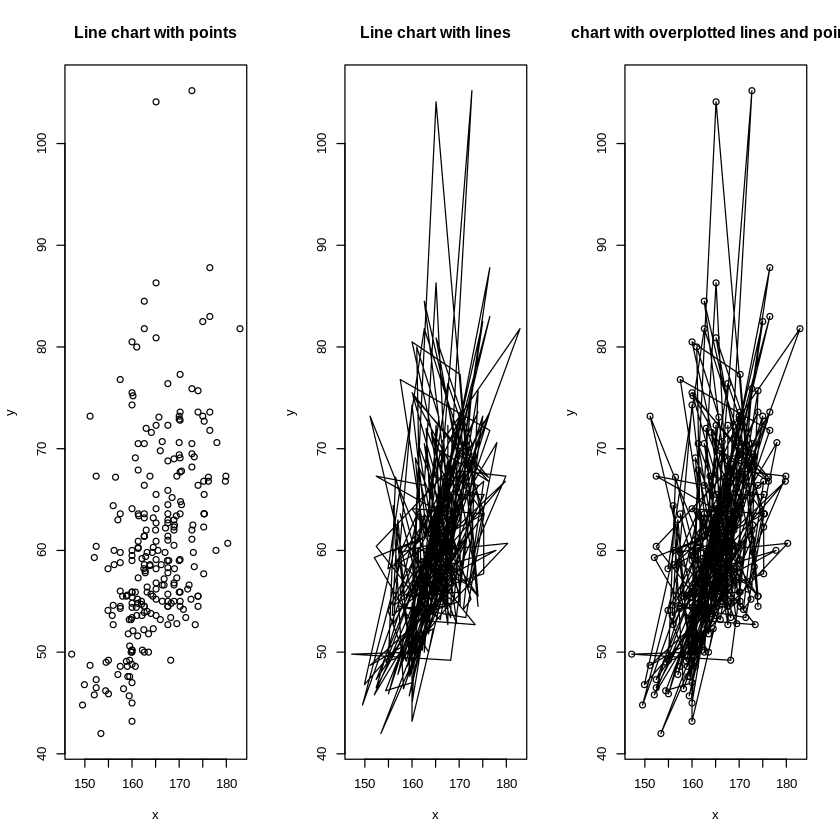

In [23]:
x <- female$hgt
y <- female$wgt
#par() is set to plot 3 different plots in the same panel.
par(mfrow=c(1,3))
plot(x, y, type="n", main="Line chart with points")
lines(x, y, type='p')
plot(x, y, type="n", main="Line chart with lines") 
lines(x, y, type='l') 
plot(x, y, type="n", main="chart with overplotted lines and points") 
lines(x, y, type='o') 

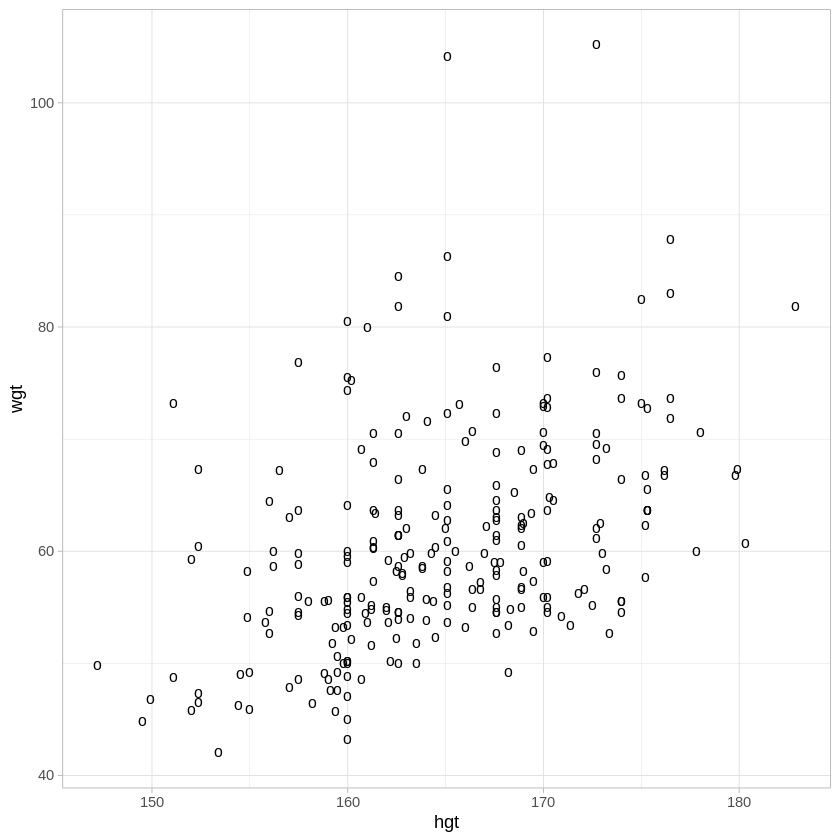

In [24]:
ggplot(female, aes(x=hgt,y=wgt)) + geom_point(shape='o',size=3) + theme_light()

The plots above don't make any sense because the data is random and unordered. Let's see if we get a useful plot after sorting the data.

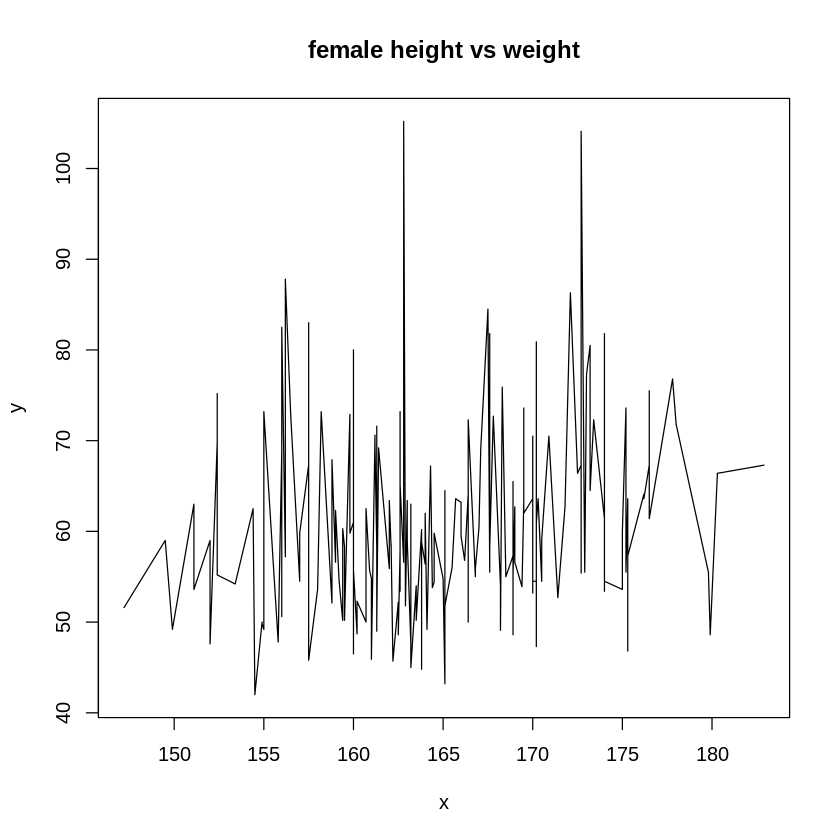

In [25]:
x <- sort(female$hgt)
y <- female$wgt
plot(x, y, type="n", main="female height vs weight") 
lines(x, y, type='l')

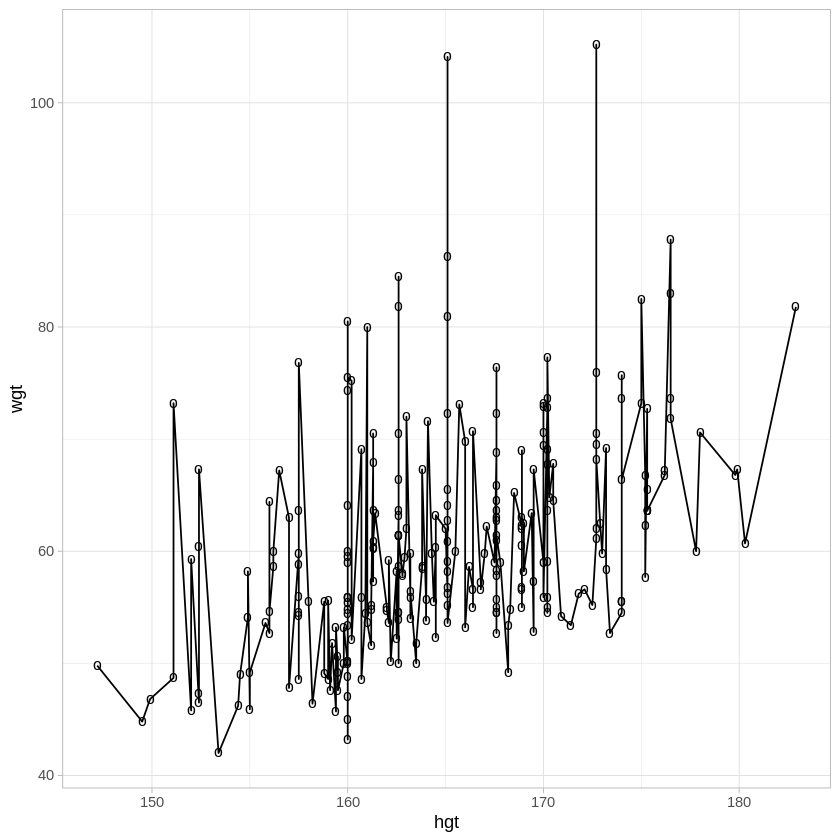

In [26]:
ggplot(female, aes(x=hgt,y=wgt)) + geom_point(shape='o',size=3) + geom_line() + theme_light()

The plot is still not aesthetic and readable but it is alot better than the previous plot. 
So <b>line charts make sense when the data is ordered. </b>

One of the issues with the last plot was that we only sorted the X axis values independent of the Y axis values.
We have broken the association of the two values at the per-datum level.
In a more traditional usage, the full data set is sorted based on a column of values.

## This concludes the review of plotting.